In [1]:
import glob
import obspy
import numpy as np
import h5py
from obspy import UTCDateTime as UTC
import matplotlib.pyplot as plt
from scipy import signal
from obspy.signal.util import smooth
import time
from scipy.signal import tukey
import obspy.signal.filter
import matplotlib.patches as patches
from matplotlib.offsetbox import AnchoredText

import sys
sys.path.append('/home/yaolinm/Projects/Florence/funcs/')
from ncf import *
from dbf import *

In [2]:
chs=np.arange(450,2700,5)
dbf_model=np.zeros((len(chs),80))
path='/scratch/zspica_root/zspica0/yaolinm/Florence/inversion2/'
for i,ch in enumerate(chs):
    dbf_model[i,:]=np.load(path+str(ch).zfill(4)+'/singlemode_vs.npy')
sources=np.arange(250,2505,5)      
path='/scratch/zspica_root/zspica0/yaolinm/Florence/ss_inversion/'
ss_model=np.zeros((len(sources),80))
for i,source in enumerate(sources):
    ss_model[i,:]=np.load(path+str(source).zfill(4)+'/singlemode_vs2.npy')

In [6]:
picks=np.zeros((451,169))
spatial_samp=20/1000
cmin = 0.3 # Min Phase vel. (in km/s)
cmax = 2.5 # Max Phase vel. (in km/s)
step = 0.005 # step for the phase vel. (in km/s)
ctrials=np.arange(cmin,cmax+step,step)
epdist = np.arange(0,400*spatial_samp, spatial_samp) 
    
for i,source in enumerate(sources):
    
    print(i)
    
    df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(source).zfill(4)+'.npy')
    freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])

    specraw=np.zeros((ctrials.size,len(freqpoints)))

    for j in range(len(freqpoints)):
        ktry=(2*np.pi*freqpoints[j])/ctrials # 2*pi*frequency[j]/Phase_vel
        stack_thisfreq=dosinglefreq(epdist,cumphase[:,j],ktry,False)
        specraw[:,j]=stack_thisfreq[0].reshape(len(ctrials),)
    specnorm=specraw/np.max(specraw,0)
    X,Y = np.meshgrid(freqpoints, ctrials)
    
    picks[i,:]=ctrials[np.argmax(specnorm,axis=0)]

0
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
1
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
2
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
3
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
4
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
5
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
6
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
7
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
8
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
9
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
10
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
11
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
12
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
13
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
14
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
15
(400, 600)
(400, 

124
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
125
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
126
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
127
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
128
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
129
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
130
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
131
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
132
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
133
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
134
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
135
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
136
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
137
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
138
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 

247
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
248
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
249
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
250
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
251
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
252
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
253
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
254
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
255
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
256
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
257
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
258
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
259
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
260
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
261
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 

370
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
371
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
372
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
373
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
374
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
375
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
376
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
377
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
378
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
379
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
380
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
381
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
382
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
383
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
384
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 

In [4]:
name_save = 'Interp_bathy_NetCDF_Final.h5'

with h5py.File(name_save, 'r') as f:

    bathy = f.get('bathy')[:] # bathymetry at each channel (in m)
    IU_dist = f.get('IU_dist')[:]  # in meters
    Channel =  f.get('Channel')[:]  # Channel number
    lat  = f.get('lat_inter')[:]  # latitude of each channel
    lon = f.get('lon_inter')[:]# longitude of each channel
    inter_sta_dist = f.get('inter_sta_dist')[:] # distance between each interpolated channel (in m)
    
topo=bathy[135:2390:5]

In [5]:
lfhf=[0.2,3]
spacing=20/1000
ctrials=np.arange(0.3,2.5+0.005,0.005)

def get_freqdomain_info(tdodata, dt = 0.1, lfhf = [0.33, 2]): 

    td_data=tdodata
    num_ts=td_data.shape[1]
    print(td_data.shape)
    td_data = td_data - td_data.mean()
    """ Remove data mean before Fourier transforming"""
    fs=np.fft.fftfreq(num_ts,dt) # frequency 
    fd_data=np.fft.rfft(td_data)
    print(fd_data.shape)
    fs_positive=fs[:fd_data.shape[1]]
    if num_ts%2==0:
        fs_positive[-1]=-1*fs_positive[-1]
    rel_indices=np.intersect1d(np.where(fs_positive>=lfhf[0])[0],np.where(fs_positive<=lfhf[1])[0])
    print("length of rel_indices is ", len(rel_indices) )
    freqpoints = fs_positive[rel_indices]
    afdm = np.matrix(fd_data[:,rel_indices])
    print(afdm.shape)
    cumphase=np.unwrap(np.angle(afdm))
    return freqpoints, afdm, cumphase
    
def dosinglefreq(absdist,true_phase,ktrials,tempprint=False):
    
    rel_dist=absdist-absdist[0]
    kxmat=np.outer(ktrials,rel_dist)
    apsm=np.exp(1j*kxmat)
    # apsm stands for applied_phase_shift_matrix
    tpmat=true_phase.reshape(len(true_phase),1)
    #tpmat=np.flipud(true_phase.reshape(len(true_phase),1))
    tpcm=np.exp(1j*tpmat)
    # tpcm stands for true_phase_column_matrix
    stacked_result=np.dot(apsm,tpcm)
    mod_stack=np.abs(stacked_result)
    return mod_stack,apsm,tpcm

def slantstack(tododata,lfhf,spacing,ctrials):

    rel_dist=np.arange(tododata.shape[0]*spacing,0,-spacing)

    fs=np.fft.fftfreq(tododata.shape[1],1/10)
    fd_data=np.fft.rfft(tododata)
    fs_positive=fs[:fd_data.shape[1]]
    if tododata.shape[1]%2==0:
        fs_positive[-1]=-1*fs_positive[-1]
    rel_indices=np.intersect1d(np.where(fs_positive>=lfhf[0])[0],np.where(fs_positive<=lfhf[1])[0])

    spec=np.zeros((len(rel_indices),len(ctrials)))
    for k in range(len(rel_indices)):
        ktry=fs_positive[rel_indices[k]]/ctrials
        kxmat=np.outer(ktry,rel_dist)
        kxmat=np.exp(-2j*np.pi*kxmat)
    #     spec[k,:]=np.abs(kxmat@(np.exp(1j*np.unwrap(np.angle(fd_data[:,rel_indices[k]].reshape(len(tododata),1)))))).reshape(-1)
        spec[k,:]=np.abs(kxmat@(fd_data[:,rel_indices[k]].reshape(len(tododata),1))).reshape(-1)
        
    return spec

(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)


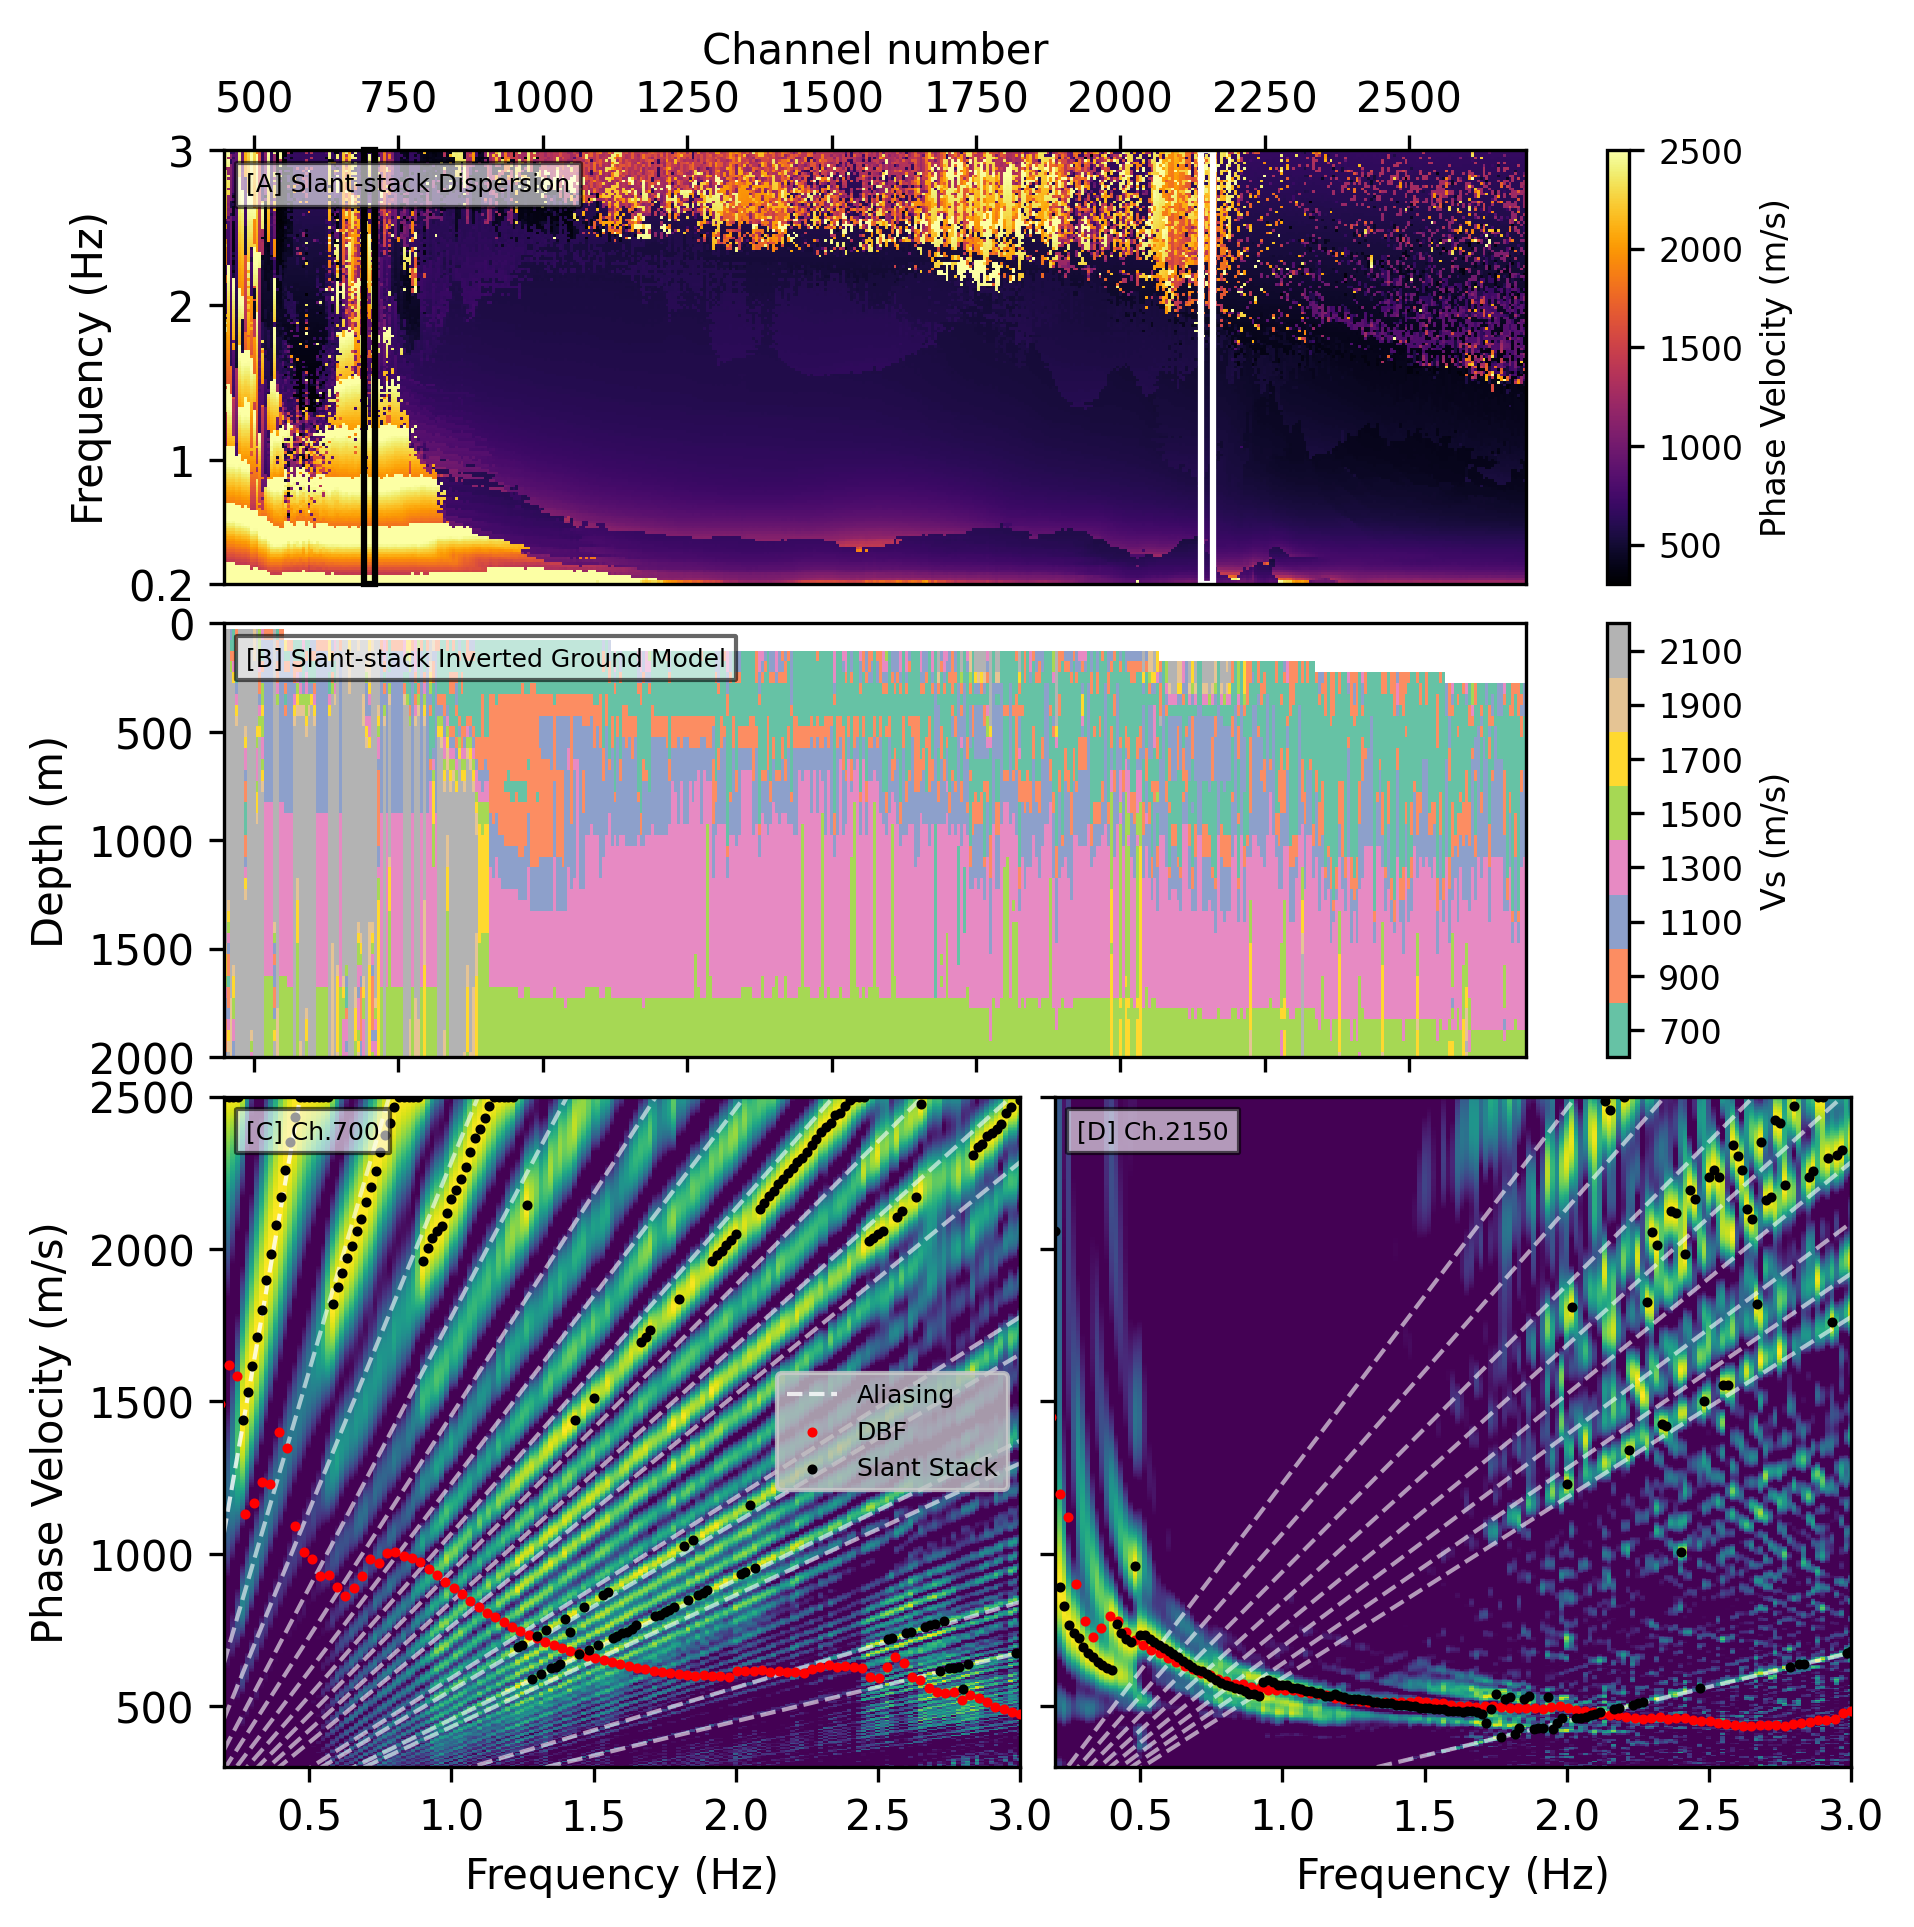

In [55]:
spatial_samp=20/1000
cmin = 0.3 # Min Phase vel. (in km/s)
cmax = 2.5 # Max Phase vel. (in km/s)
step = 0.005 # step for the phase vel. (in km/s)
ctrials=np.arange(cmin,cmax+step,step)
epdist = np.arange(0,400*spatial_samp, spatial_samp) 

fig=plt.figure(figsize=(7,7),dpi=300)
fig.subplots_adjust(hspace=0.2,wspace=0.2)

ax1=plt.subplot2grid(shape=(7,8),loc=(0,0),colspan=8,rowspan=2)
ax2=plt.subplot2grid(shape=(7,8),loc=(2,0),colspan=8,rowspan=2)
ax3=plt.subplot2grid(shape=(7,8),loc=(4,0),colspan=4,rowspan=3)
ax4=plt.subplot2grid(shape=(7,8),loc=(4,4),colspan=4,rowspan=3)
axs=[ax1,ax2,ax3,ax4]

freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
X,Y=np.meshgrid(sources+200,freqpoints)
dispersion=axs[0].pcolormesh(X,Y,picks.T*1000,cmap='inferno')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_xticklabels([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_yticks([0.2,1,2,3])
axs[0].set_yticklabels([0.2,1,2,3])
axs[0].set_ylim(0.2,3)
cbar=fig.colorbar(dispersion,ax=axs[0])
cbar.set_label('Phase Velocity (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
at = AnchoredText('[A] Slant-stack Dispersion',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[0].add_artist(at)
axs[0].set_xlabel('Channel number')
axs[0].xaxis.tick_top()
axs[0].xaxis.set_label_position('top')
rect = patches.Rectangle((690,0.2),20,2.8, linewidth=1.5, edgecolor='k', facecolor='none',clip_on=False)
axs[0].add_patch(rect)
rect = patches.Rectangle((2140,0.2),20,2.8, linewidth=1.5, edgecolor='w', facecolor='none',clip_on=False)
axs[0].add_patch(rect)

adjusted_model=np.zeros_like(ss_model)
for i in range(len(ss_model)):
    shifts=int(np.abs(topo[i])//50)+1
    adjusted_model[i,:shifts]=np.nan
    adjusted_model[i,shifts:]=ss_model[i,:ss_model.shape[1]-shifts]
    
depths=np.arange(0,4000,50)
X,Y=np.meshgrid(sources+200,depths)
vs=axs[1].pcolormesh(X,Y,adjusted_model.T,vmin=600,vmax=2200,cmap='Set2')
axs[1].set_ylabel('Depth (m)')
axs[1].set_ylim(2000,0)
cbar=fig.colorbar(vs,ax=axs[1])
cbar.set_label('Vs (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
cbar.set_ticks([700,900,1100,1300,1500,1700,1900,2100])
axs[1].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xticklabels(['','','','','','','','',''])
at = AnchoredText('[B] Slant-stack Inverted Ground Model',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[1].add_artist(at)

df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(500).zfill(4)+'.npy')
freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
specraw=np.zeros((ctrials.size,len(freqpoints)))
for j in range(len(freqpoints)):
    ktry=(2*np.pi*freqpoints[j])/ctrials # 2*pi*frequency[j]/Phase_vel
    stack_thisfreq=dosinglefreq(epdist,cumphase[:,j],ktry,False)
    specraw[:,j]=stack_thisfreq[0].reshape(len(ctrials),)
specnorm=specraw/np.max(specraw,0)
# spec=slantstack(df[:,600:1200],lfhf,spacing,ctrials)
# specnorm=(spec.T/np.max(spec,axis=1)).T
dbf=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/inversion/0700/dispersion.npy')
frange=np.linspace(0.1,3,100)
X,Y = np.meshgrid(freqpoints, ctrials)
axs[2].pcolor(X, Y, specnorm,vmin=0.25)
axs[2].plot(freqpoints,0.02*400/(1.5)*freqpoints,c='w',ls='--',lw=1,alpha=0.8,label='Aliasing')
for i in [2,3,4,5,6,7,8,9,10,13,14,17,18,28,35]:
    axs[2].plot(freqpoints,0.02*400/(0.5+i)*freqpoints,c='w',ls='--',lw=1,alpha=0.6)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Phase Velocity (m/s)')
axs[2].set_yticks([0.5,1,1.5,2,2.5])
axs[2].set_yticklabels([500,1000,1500,2000,2500])
axs[2].scatter(frange,dbf[:,0],c='r',s=2,label='DBF',zorder=98)
axs[2].scatter(freqpoints,ctrials[np.argmax(specnorm,axis=0)],c='k',s=2,label='Slant Stack',zorder=99)
axs[2].set_xlim(0.2,3)
axs[2].set_ylim(cmin, cmax)
axs[2].legend(fontsize=6,loc=7,facecolor='silver')
at = AnchoredText('[C] Ch.700',prop=dict(size=6), frameon=True,loc=2,zorder=100)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[2].add_artist(at)

df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(1950).zfill(4)+'.npy')
freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
specraw=np.zeros((ctrials.size,len(freqpoints)))
for j in range(len(freqpoints)):
    ktry=(2*np.pi*freqpoints[j])/ctrials # 2*pi*frequency[j]/Phase_vel
    stack_thisfreq=dosinglefreq(epdist,cumphase[:,j],ktry,False)
    specraw[:,j]=stack_thisfreq[0].reshape(len(ctrials),)
specnorm=specraw/np.max(specraw,0)
# spec=slantstack(df[:,600:1200],lfhf,spacing,ctrials)
# specnorm=(spec.T/np.max(spec,axis=1)).T
dbf=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/inversion/2150/dispersion.npy')
frange=np.linspace(0.1,3,100)
X,Y = np.meshgrid(freqpoints, ctrials)
axs[3].pcolor(X, Y, specnorm,vmin=0.25)
for i in [6,7,8,9,10,11,12,13,35]:
    axs[3].plot(freqpoints,0.02*400/(0.5+i)*freqpoints,c='w',ls='--',lw=1,alpha=0.6)
axs[3].set_xlabel('Frequency (Hz)')
axs[3].set_yticks([0.5,1,1.5,2,2.5])
axs[3].set_yticklabels(['','','','',''])
axs[3].scatter(frange,dbf[:,0],c='r',s=2,label='DBF',zorder=98)
axs[3].scatter(freqpoints,ctrials[np.argmax(specnorm,axis=0)],c='k',s=2,label='Slant Stack',zorder=99)
axs[3].set_xlim(0.2,3)
axs[3].set_ylim(0.3,2.5)
at = AnchoredText('[D] Ch.2150',prop=dict(size=6), frameon=True,loc=2,zorder=100)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[3].add_artist(at)

(400, 600)
(400, 301)
length of rel_indices is  139


Text(0.5, 0, 'Channel number')

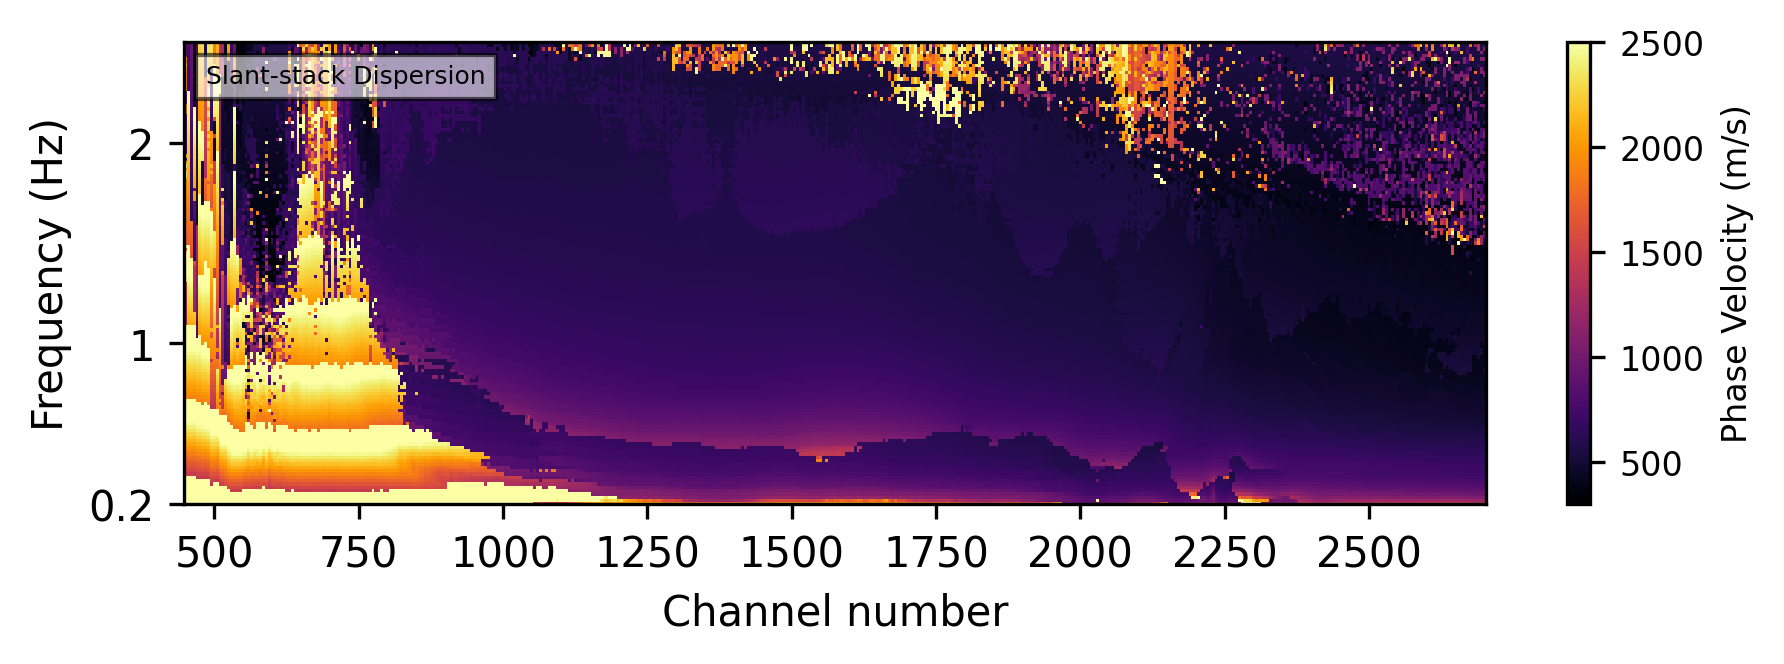

In [67]:
fig,ax=plt.subplots(1,1,figsize=(7,2),dpi=300)
axs=[ax,ax]

freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,2.5])
X,Y=np.meshgrid(sources+200,freqpoints)
dispersion=axs[0].pcolormesh(X,Y,picks.T*1000,cmap='inferno')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_xticklabels([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_yticks([0.2,1,2])
axs[0].set_yticklabels([0.2,1,2])
axs[0].set_ylim(0.2,2.5)
cbar=fig.colorbar(dispersion,ax=axs[0])
cbar.set_label('Phase Velocity (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
at = AnchoredText('Slant-stack Dispersion',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[0].add_artist(at)
axs[0].set_xlabel('Channel number')

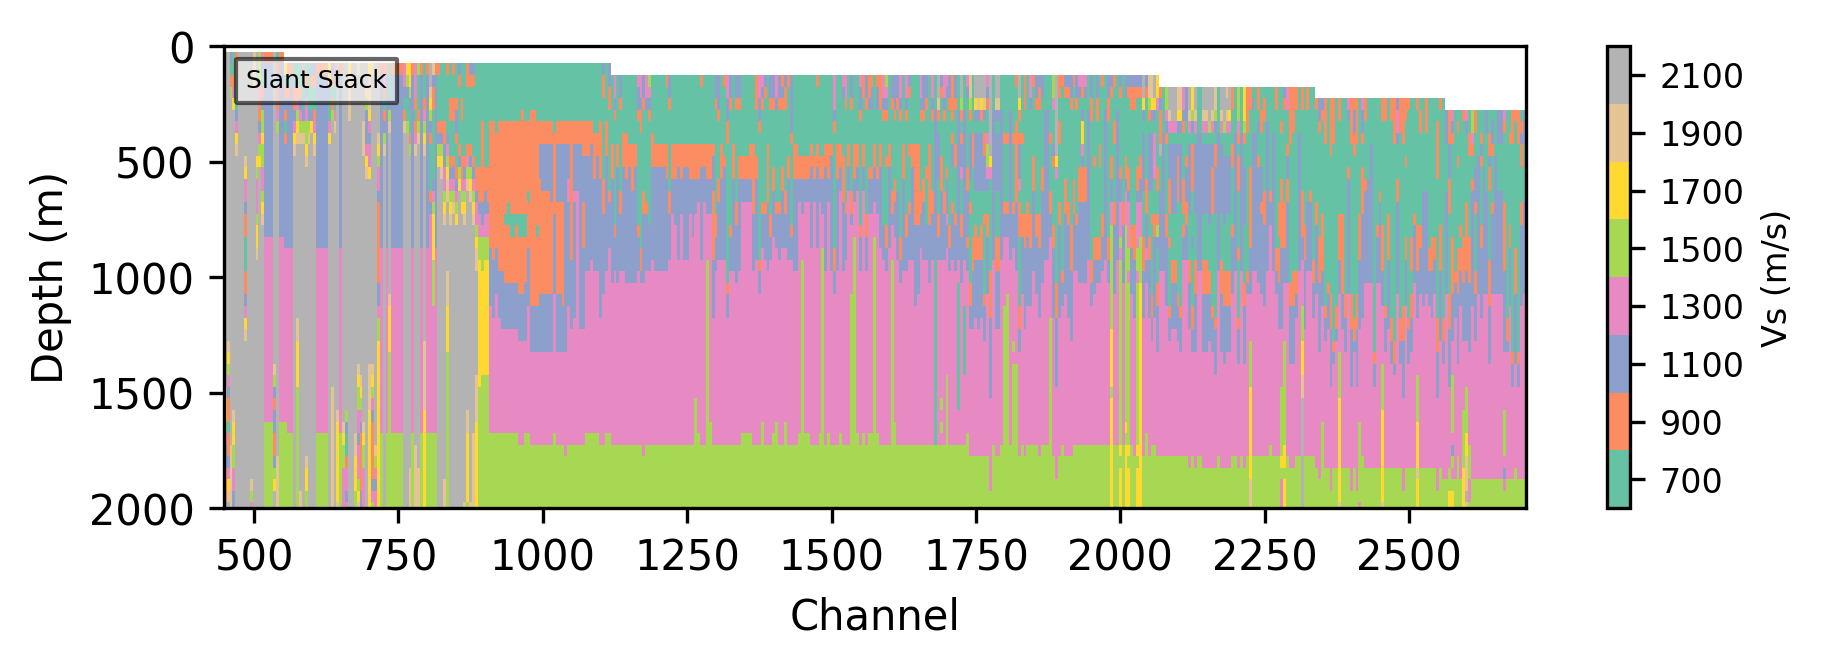

In [64]:
fig,ax=plt.subplots(1,1,figsize=(7,2),dpi=300)
axs=[ax,ax]

depths=np.arange(0,4000,50)
X,Y=np.meshgrid(sources+200,depths)
vs=axs[1].pcolormesh(X,Y,adjusted_model.T,vmin=600,vmax=2200,cmap='Set2')
axs[1].set_ylabel('Depth (m)')
axs[1].set_ylim(2000,0)
cbar=fig.colorbar(vs,ax=axs[1])
cbar.set_label('Vs (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
cbar.set_ticks([700,900,1100,1300,1500,1700,1900,2100])
axs[1].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xticklabels([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xlabel('Channel')
at = AnchoredText('Slant Stack',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[1].add_artist(at)


(400, 600)
(400, 301)
length of rel_indices is  169


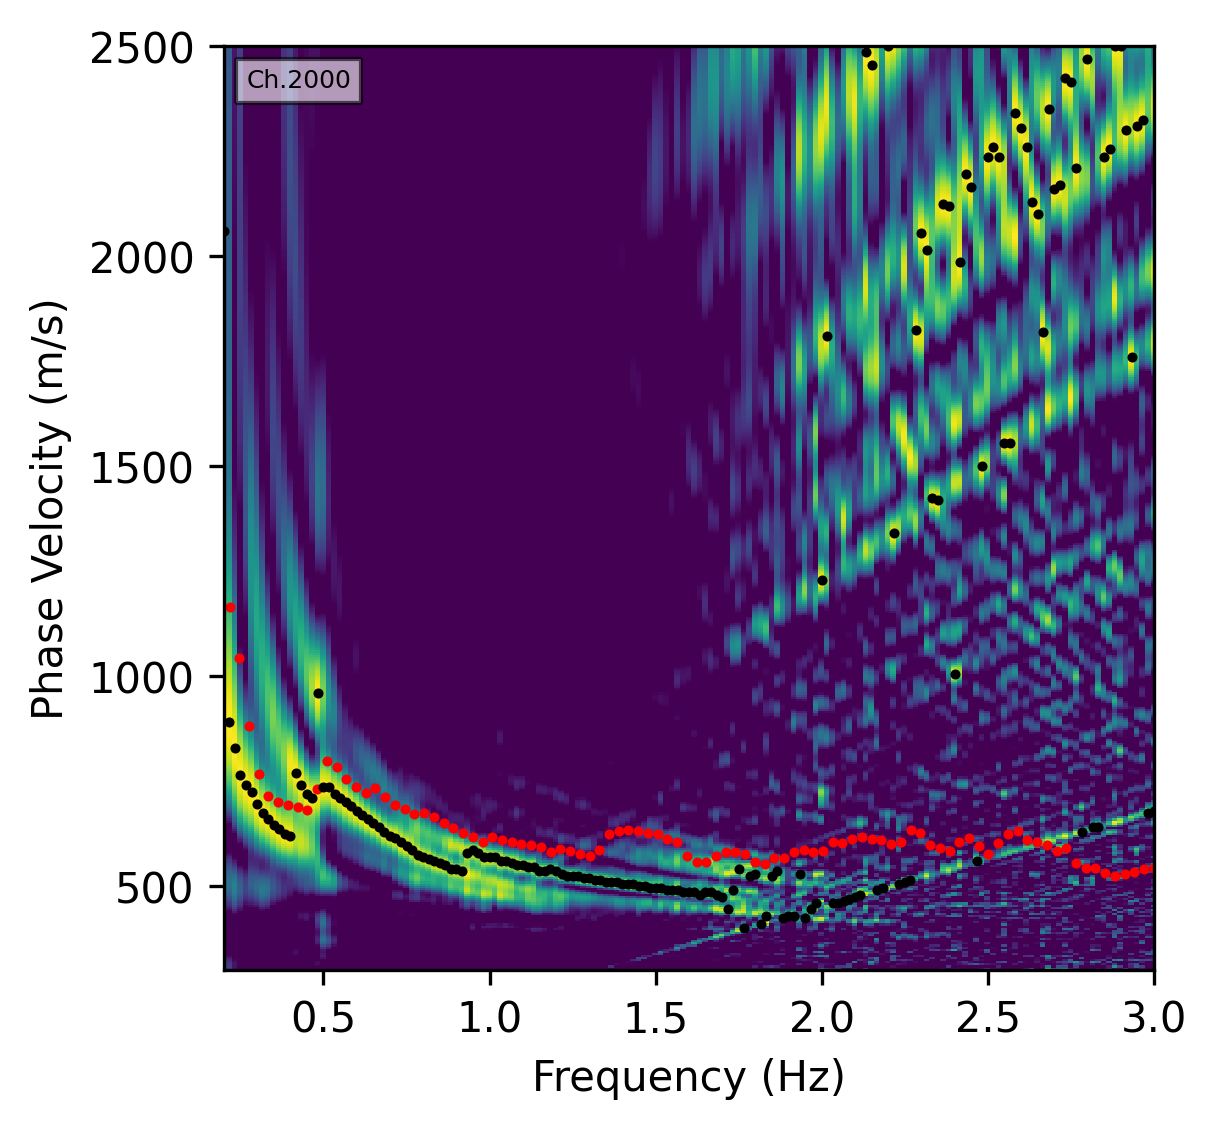

In [68]:
fig,ax=plt.subplots(1,1,figsize=(4,4),dpi=300)
axs=[ax,ax,ax]
df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(1950).zfill(4)+'.npy')
freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
specraw=np.zeros((ctrials.size,len(freqpoints)))
for j in range(len(freqpoints)):
    ktry=(2*np.pi*freqpoints[j])/ctrials # 2*pi*frequency[j]/Phase_vel
    stack_thisfreq=dosinglefreq(epdist,cumphase[:,j],ktry,False)
    specraw[:,j]=stack_thisfreq[0].reshape(len(ctrials),)
specnorm=specraw/np.max(specraw,0)
dbf=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/inversion/2000/dispersion.npy')
frange=np.linspace(0.1,3,100)
X,Y = np.meshgrid(freqpoints, ctrials)
axs[2].pcolor(X, Y, specnorm,vmin=0.25)
# axs[2].plot(freqpoints,0.02*400/(1.5)*freqpoints,c='w',ls='--',lw=1,alpha=0.8,label='Aliasing')
# for i in range(9,15):
#     axs[2].plot(freqpoints,0.02*400/(0.5+i)*freqpoints,c='w',ls='--',lw=1,alpha=0.8)
# axs[2].plot(freqpoints,0.02*400/(34.5)*freqpoints,c='w',ls='--',lw=1,alpha=0.8,label='Aliasing')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Phase Velocity (m/s)')
axs[2].set_yticks([0.5,1,1.5,2,2.5])
axs[2].set_yticklabels([500,1000,1500,2000,2500])
axs[2].scatter(frange,dbf[:,0],c='r',s=2,label='DBF')
axs[2].scatter(freqpoints,ctrials[np.argmax(specnorm,axis=0)],c='k',s=2,label='Slant Stack')
axs[2].set_xlim(0.2,3)
axs[2].set_ylim(cmin, cmax)
at = AnchoredText('Ch.2000',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[2].add_artist(at)

(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)
(400, 600)
(400, 301)
length of rel_indices is  169
(400, 169)


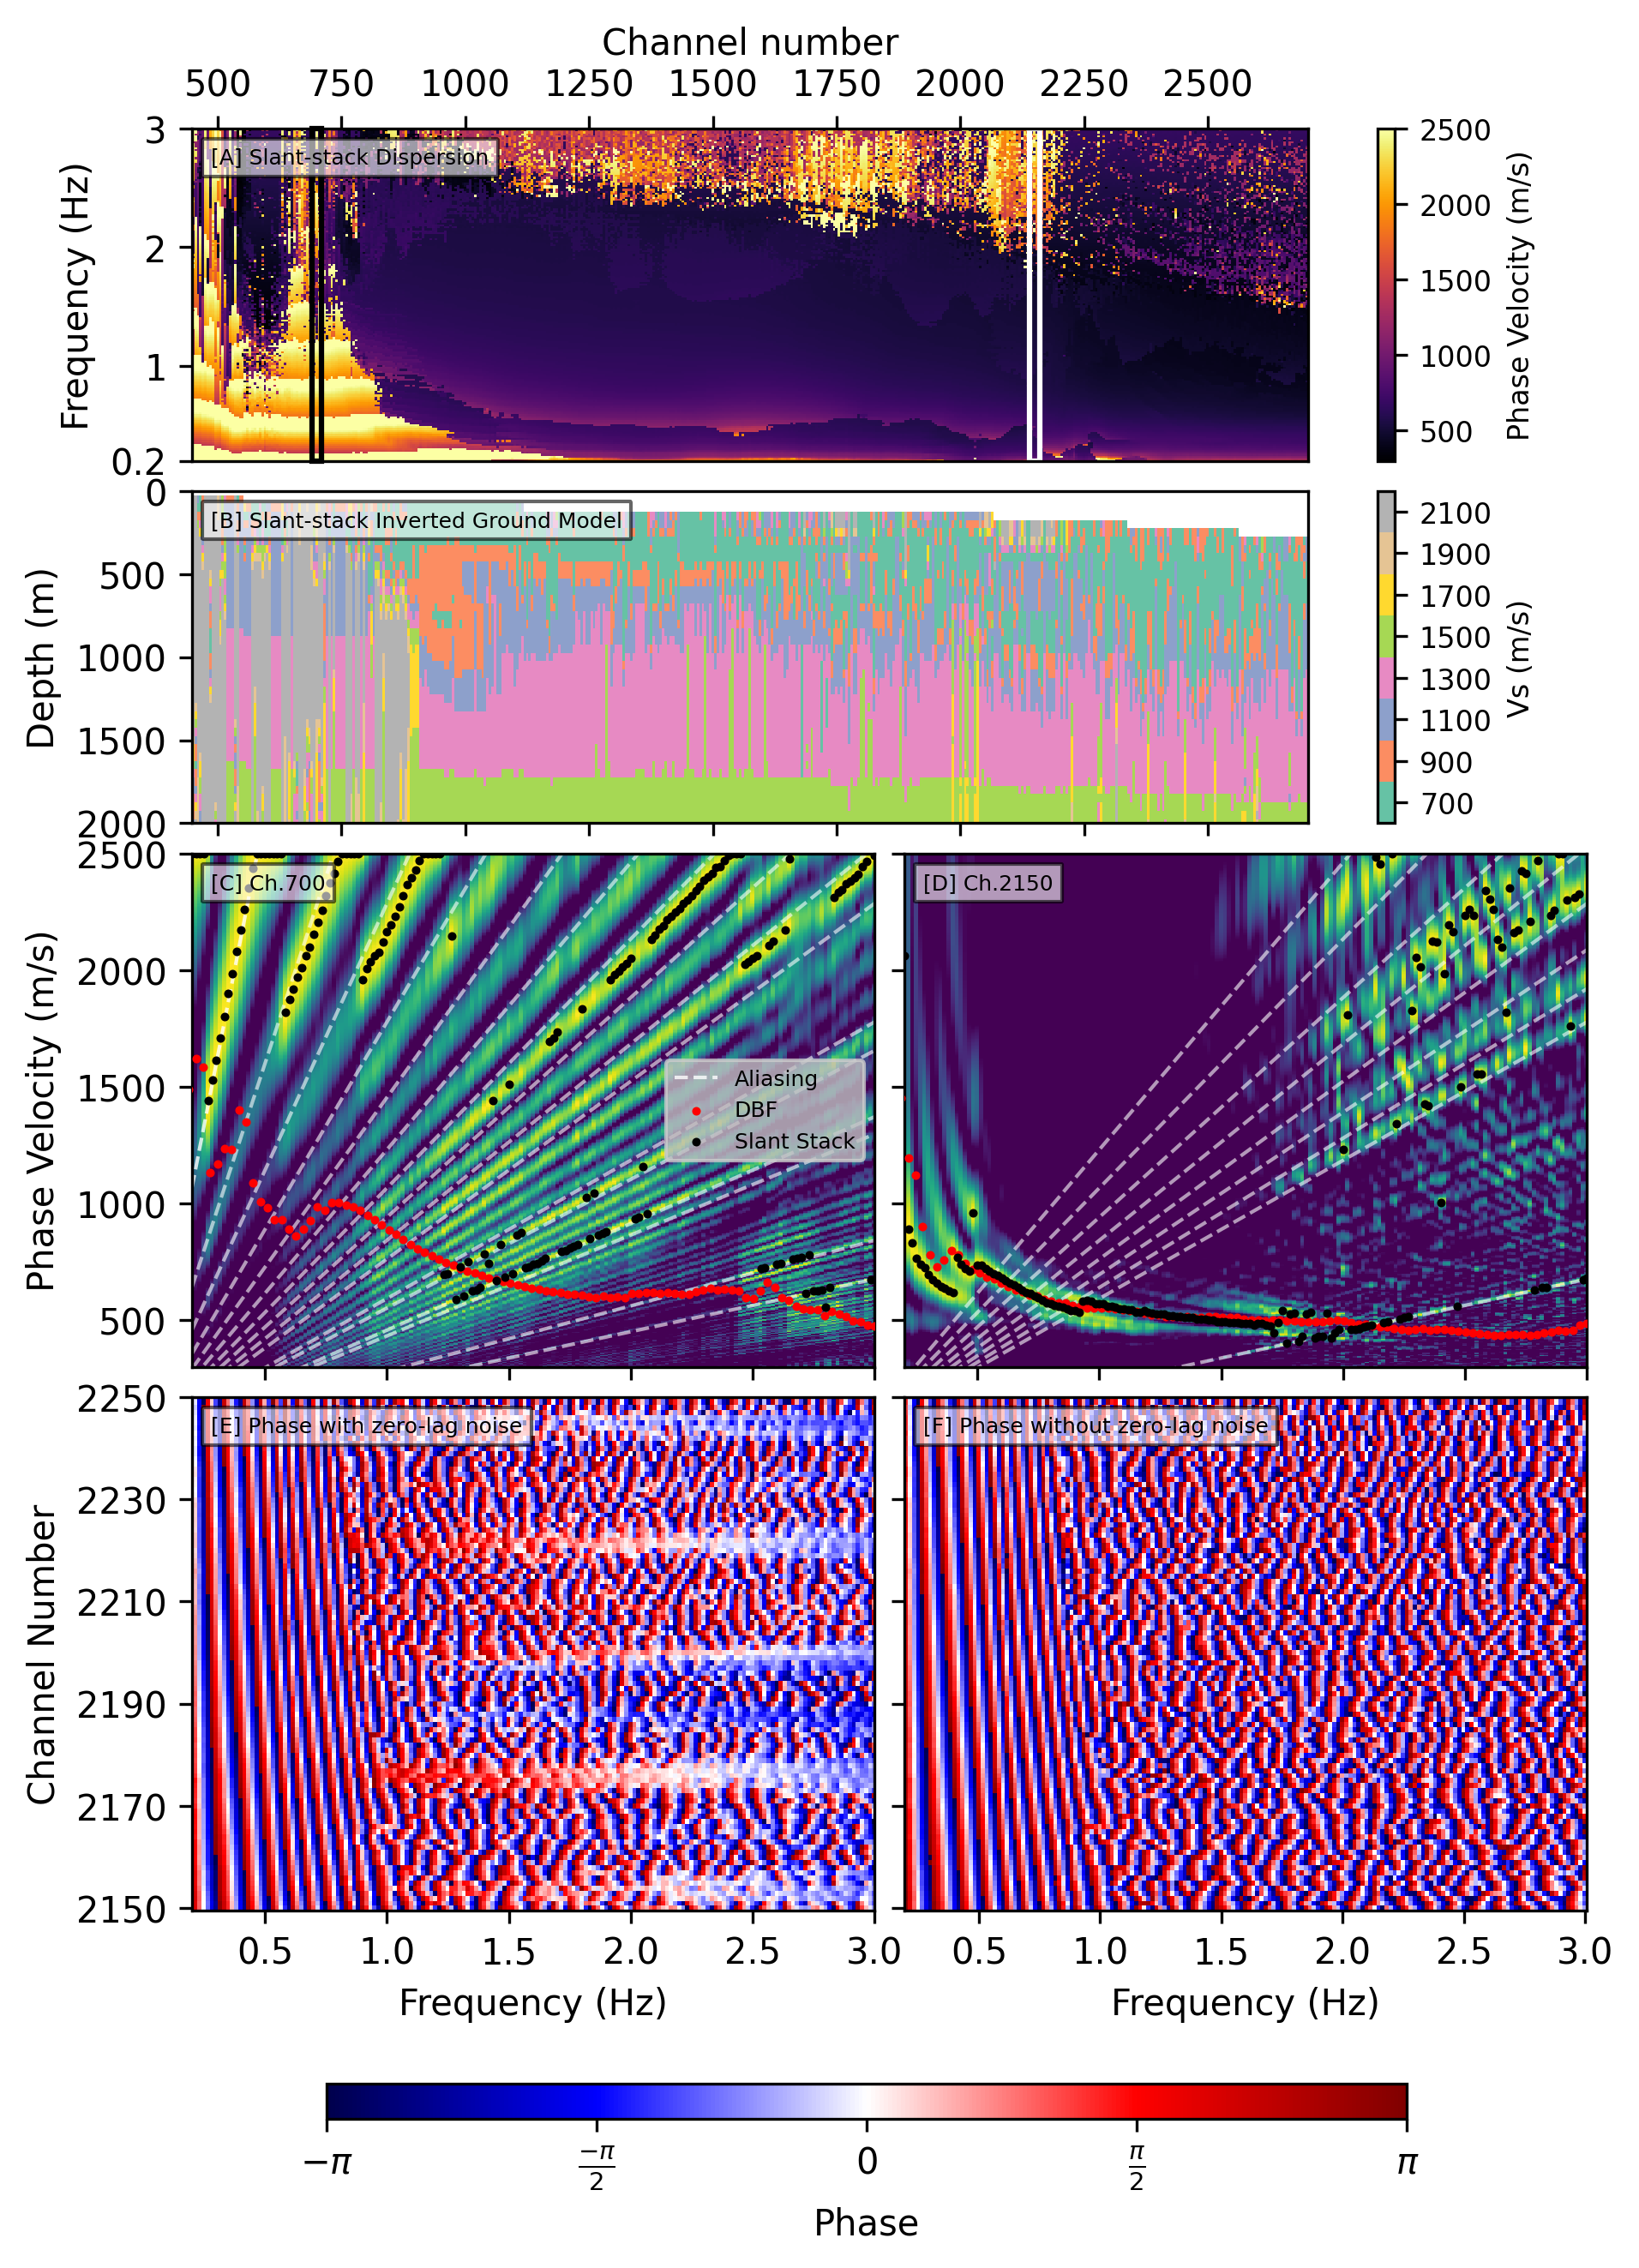

In [10]:
%matplotlib inline

spatial_samp=20/1000
cmin = 0.3 # Min Phase vel. (in km/s)
cmax = 2.5 # Max Phase vel. (in km/s)
step = 0.005 # step for the phase vel. (in km/s)
ctrials=np.arange(cmin,cmax+step,step)
epdist = np.arange(0,400*spatial_samp, spatial_samp) 

fig=plt.figure(figsize=(7,9),dpi=300)
fig.subplots_adjust(hspace=0.2,wspace=0.2)

ax1=plt.subplot2grid(shape=(10,8),loc=(0,0),colspan=8,rowspan=2)
ax2=plt.subplot2grid(shape=(10,8),loc=(2,0),colspan=8,rowspan=2)
ax3=plt.subplot2grid(shape=(10,8),loc=(4,0),colspan=4,rowspan=3)
ax4=plt.subplot2grid(shape=(10,8),loc=(4,4),colspan=4,rowspan=3)
ax5=plt.subplot2grid(shape=(10,8),loc=(7,0),colspan=4,rowspan=3)
ax6=plt.subplot2grid(shape=(10,8),loc=(7,4),colspan=4,rowspan=3)
axs=[ax1,ax2,ax3,ax4,ax5,ax6]

freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
X,Y=np.meshgrid(sources+200,freqpoints)
dispersion=axs[0].pcolormesh(X,Y,picks.T*1000,cmap='inferno')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_xticklabels([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_yticks([0.2,1,2,3])
axs[0].set_yticklabels([0.2,1,2,3])
axs[0].set_ylim(0.2,3)
cbar=fig.colorbar(dispersion,ax=axs[0])
cbar.set_label('Phase Velocity (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
at = AnchoredText('[A] Slant-stack Dispersion',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[0].add_artist(at)
axs[0].set_xlabel('Channel number')
axs[0].xaxis.tick_top()
axs[0].xaxis.set_label_position('top')
rect = patches.Rectangle((690,0.2),20,2.8, linewidth=1.5, edgecolor='k', facecolor='none',clip_on=False)
axs[0].add_patch(rect)
rect = patches.Rectangle((2140,0.2),20,2.8, linewidth=1.5, edgecolor='w', facecolor='none',clip_on=False)
axs[0].add_patch(rect)

adjusted_model=np.zeros_like(ss_model)
for i in range(len(ss_model)):
    shifts=int(np.abs(topo[i])//50)+1
    adjusted_model[i,:shifts]=np.nan
    adjusted_model[i,shifts:]=ss_model[i,:ss_model.shape[1]-shifts]
    
depths=np.arange(0,4000,50)
X,Y=np.meshgrid(sources+200,depths)
vs=axs[1].pcolormesh(X,Y,adjusted_model.T,vmin=600,vmax=2200,cmap='Set2')
axs[1].set_ylabel('Depth (m)')
axs[1].set_ylim(2000,0)
cbar=fig.colorbar(vs,ax=axs[1])
cbar.set_label('Vs (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
cbar.set_ticks([700,900,1100,1300,1500,1700,1900,2100])
axs[1].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xticklabels(['','','','','','','','',''])
at = AnchoredText('[B] Slant-stack Inverted Ground Model',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[1].add_artist(at)

df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(500).zfill(4)+'.npy')
freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
specraw=np.zeros((ctrials.size,len(freqpoints)))
for j in range(len(freqpoints)):
    ktry=(2*np.pi*freqpoints[j])/ctrials # 2*pi*frequency[j]/Phase_vel
    stack_thisfreq=dosinglefreq(epdist,cumphase[:,j],ktry,False)
    specraw[:,j]=stack_thisfreq[0].reshape(len(ctrials),)
specnorm=specraw/np.max(specraw,0)
# spec=slantstack(df[:,600:1200],lfhf,spacing,ctrials)
# specnorm=(spec.T/np.max(spec,axis=1)).T
dbf=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/inversion/0700/dispersion.npy')
frange=np.linspace(0.1,3,100)
X,Y = np.meshgrid(freqpoints, ctrials)
axs[2].pcolor(X, Y, specnorm,vmin=0.25)
axs[2].plot(freqpoints,0.02*400/(1.5)*freqpoints,c='w',ls='--',lw=1,alpha=0.8,label='Aliasing')
for i in [2,3,4,5,6,7,8,9,10,13,14,17,18,28,35]:
    axs[2].plot(freqpoints,0.02*400/(0.5+i)*freqpoints,c='w',ls='--',lw=1,alpha=0.6)
axs[2].set_ylabel('Phase Velocity (m/s)')
axs[2].set_yticks([0.5,1,1.5,2,2.5])
axs[2].set_yticklabels([500,1000,1500,2000,2500])
axs[2].scatter(frange,dbf[:,0],c='r',s=2,label='DBF',zorder=98)
axs[2].scatter(freqpoints,ctrials[np.argmax(specnorm,axis=0)],c='k',s=2,label='Slant Stack',zorder=99)
axs[2].set_xlim(0.2,3)
axs[2].set_ylim(cmin, cmax)
axs[2].set_xticks([0.5,1,1.5,2,2.5,3])
axs[2].set_xticklabels(['','','','','',''])
axs[2].legend(fontsize=6,loc=7,facecolor='silver')
at = AnchoredText('[C] Ch.700',prop=dict(size=6), frameon=True,loc=2,zorder=100)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[2].add_artist(at)

df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(1950).zfill(4)+'.npy')
freqpoints, afdm, cumphase=get_freqdomain_info(df[:,600:1200],1/10,[0.2,3])
specraw=np.zeros((ctrials.size,len(freqpoints)))
for j in range(len(freqpoints)):
    ktry=(2*np.pi*freqpoints[j])/ctrials # 2*pi*frequency[j]/Phase_vel
    stack_thisfreq=dosinglefreq(epdist,cumphase[:,j],ktry,False)
    specraw[:,j]=stack_thisfreq[0].reshape(len(ctrials),)
specnorm=specraw/np.max(specraw,0)
# spec=slantstack(df[:,600:1200],lfhf,spacing,ctrials)
# specnorm=(spec.T/np.max(spec,axis=1)).T
dbf=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/inversion/2150/dispersion.npy')
frange=np.linspace(0.1,3,100)
X,Y = np.meshgrid(freqpoints, ctrials)
axs[3].pcolor(X, Y, specnorm,vmin=0.25)
for i in [6,7,8,9,10,11,12,13,35]:
    axs[3].plot(freqpoints,0.02*400/(0.5+i)*freqpoints,c='w',ls='--',lw=1,alpha=0.6)
axs[3].set_yticks([0.5,1,1.5,2,2.5])
axs[3].set_yticklabels(['','','','',''])
axs[3].scatter(frange,dbf[:,0],c='r',s=2,label='DBF',zorder=98)
axs[3].scatter(freqpoints,ctrials[np.argmax(specnorm,axis=0)],c='k',s=2,label='Slant Stack',zorder=99)
axs[3].set_xlim(0.2,3)
axs[3].set_ylim(0.3,2.5)
axs[3].set_xticks([0.5,1,1.5,2,2.5,3])
axs[3].set_xticklabels(['','','','','',''])
at = AnchoredText('[D] Ch.2150',prop=dict(size=6), frameon=True,loc=2,zorder=100)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[3].add_artist(at)

df=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_ss_xcorr/pws/'+str(source).zfill(4)+'.npy')
tododata=df[:,600:].copy()
fd_data=np.fft.rfft(tododata)
fs=np.fft.fftfreq(tododata.shape[1],1/10)
fs_positive=fs[:fd_data.shape[1]]
if tododata.shape[1]%2==0:
    fs_positive[-1]=-1*fs_positive[-1]
rel_indices=np.intersect1d(np.where(fs_positive>=0.2)[0],np.where(fs_positive<=3)[0])

fd_data=np.fft.rfft(tododata)
X,Y = np.meshgrid(fs_positive[rel_indices], np.arange(200,300))
pc=ax5.pcolor(X, Y, np.angle(fd_data[200:300,rel_indices]),cmap='seismic')
ax5.set_xlim(0.2,3)
ax5.set_xlabel('Frequency (Hz)')
ax5.set_yticks([200,220,240,260,280,300])
ax5.set_yticklabels([2150,2170,2190,2210,2230,2250])
ax5.set_ylabel('Channel Number')
at = AnchoredText('[E] Phase with zero-lag noise',prop=dict(size=6), frameon=True,loc=2,zorder=100)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
ax5.add_artist(at)

tododata=df[:,600:].copy()
tododata[:,:20]=0
fd_data=np.fft.rfft(tododata)
X,Y = np.meshgrid(fs_positive[rel_indices], np.arange(200,300))
pc=ax6.pcolor(X, Y, np.angle(fd_data[200:300,rel_indices]),cmap='seismic')
ax6.set_yticks([200,220,240,260,280,300])
ax6.set_yticklabels(['','','','','',''])
ax6.set_xlabel('Frequency (Hz)')
at = AnchoredText('[F] Phase without zero-lag noise',prop=dict(size=6), frameon=True,loc=2,zorder=100)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
ax6.add_artist(at)

cax = fig.add_axes([0.2,0.02,0.6,0.015])
cbar=fig.colorbar(pc, cax=cax,orientation='horizontal')
cbar.set_label('Phase')
cbar.set_ticks([-np.pi,-0.5*np.pi,0,0.5*np.pi,np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$\frac{-\pi}{2}$','$0$', r'$\frac{\pi}{2}$',r'$\pi$'])